# Datos Inegi Censo 2025 Sonora

## Importar Herramientas y Datos

### Importar Librerias

In [1]:
import pandas as pd # Analisis de datos
import geopandas as gpd # Datos geoespaciales
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
import numpy as np # Calculos numericos
import folium # Mapas interactivos

from helpFunctions import plot_sonora_map

pd.set_option('display.max_columns', None)

## Importar datos

Para mas información consultar la página oficial del INEGI. [Click aquí](https://www.inegi.org.mx/programas/ccpv/2020/#tabulados)

In [2]:
raw_data = pd.read_csv("/Users/luishernandez/Desktop/Stats_Sonora/Datos/INEGI/Sonora/iter_26_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_26CSV20.csv")

In [3]:
raw_data.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,26,Sonora,0,Total de la entidad Sonora,0,Total de la Entidad,NaN,NaN,NaN,2944840,1472643,1472197,124294,61239,63055,2817821,1410043,1407778,2723770,1363541,1360229,2374818,1191883,1182935,2218268,1115432,1102836,2065941,1040798,1025143,143132,70693,72439,299871,147467,152404,358596,175659,182937,156550,76451,80099,152327,74634,77693,350392,171744,178648,769057,358404,188135,170269,99.97,723847,1981467,236801,218345,107741,110604,246711,121509,125202,258791,126600,132191,255716,124961,130755,247003,121417,125586,227896,113744,114152,215004,107549,107455,207000,103161,103839,203895,102318,101577,192181,95907,96274,170705,86583,84122,140464,71657,68807,121603,62762,58841,87708,45350,42358,61882,32496,29386,41519,21842,19677,26144,14305,11839,19548,11380,8168,2.07,2459398,1237307,1222091,425906,207534,218372,2629071,1322629,1306442,75302,33953,41349,62808,28170,34638,1104,605,499,61130,27307,33823,62070,1005,60499,126644,43510,21233,22277,145473,68891,64061,20976,26464,29021,26592,317996,92026,205671,18517,57018,14451,59609,40272,2458126,65700,32321,33379,11013,5155,5858,10145,4291,5854,117628,59793,57835,127769,65270,62499,8184,3312,4872,44134,21334,22800,55753,26531,29222,145810,69684,76126,214349,107284,107065,77822,3333

## Limpieza y exploración los datos

### Limpieza

In [4]:
print(f"Dimension del conjunto de datos [ {raw_data.shape} ]")


Dimension del conjunto de datos [ (7500, 286) ]


In [5]:
raw_data.describe()

,ENTIDAD,MUN,LOC,ALTITUD,POBTOT,VIVTOT,TVIVHAB
count,7500.0,7500.000000,7500.000000,7300.000000,7.500000e+03,7.500000e+03,7500.000000
mean,26.0,33.001600,953.337600,338.583699,1.183795e+03,4.343947e+02,352.398133
std,0.0,18.259687,1551.629362,406.542744,3.816815e+04,1.388134e+04,11389.542132
min,26.0,0.000000,0.000000,-8.000000,1.000000e+00,1.000000e+00,1.000000
25%,26.0,18.000000,134.000000,28.000000,2.000000e+00,1.000000e+00,1.000000
50%,26.0,30.000000,379.000000,143.000000,4.000000e+00,2.000000e+00,1.000000
75%,26.0,47.000000,998.250000,559.250000,1.000000e+01,5.000000e+00,3.000000
max,26.0,72.000000,9999.000000,2113.000000,2.944840e+06,1.079104e+06,876826.000000


In [6]:
nan_counts = raw_data.isna().sum()

# Filtrar solo las columnas que tienen al menos un NaN
nan_counts = nan_counts[nan_counts > 0]

print(nan_counts)

LONGITUD    200
LATITUD     200
ALTITUD     200
REL_H_M      25
PROM_HNV     24
dtype: int64


Afortunadamente las columnas que presentan valor Nulos, son columnas que no son relevantes para este analisis por lo tanto las descartaremos por el momento

In [7]:
cleaned_data = raw_data.drop(columns=nan_counts.index)

## EDA

### Población en Sonora

In [10]:
cleaned_data[(cleaned_data['NOM_MUN'] == 'Aconchi') & (cleaned_data['NOM_LOC'] == 'Total del Municipio')]

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
3,26,Sonora,1,Aconchi,0,Total del Municipio,2563,1227,1336,99,46,53,2464,1181,1283,2389,1144,1245,2109,1016,1093,1974,952,1022,1838,881,957,116,58,58,239,107,132,303,143,160,135,64,71,136,71,65,248,106,142,587,470,223,247,589,1624,350,174,83,91,190,88,102,225,104,121,212,105,107,172,72,100,165,76,89,154,82,72,147,76,71,185,91,94,180,85,95,160,74,86,129,68,61,120,61,59,125,60,65,78,39,39,62,24,38,47,24,23,38,15,23,2481,1196,1285,44,15,29,2346,1122,1224,25,12,13,2,0,2,0,0,0,2,0,2,2,0,2,4,20,10,10,171,84,75,18,28,41,22,362,110,269,13,61,19,63,38,2012,22,9,13,6,1,5,7,3,4,87,51,36,55,32,23,4,2,2,53,21,32,47,20,27,242,88,154,355,154,201,86,35,51,635,294,341,541,315,226,8.78,9.38,8.22,1032,272,760,1073,742,331,987,270,717,45,2,43,532,2026,865,138,132,0,831,14,53,15,647,1244,218,2379,76,0,103,790,182,608,2563,518,2045,1113,790,1110,787,790,790,165,158,2563,3.24,0.81,787,3,212,578,32,99,659,781,9,782,571,8,742,21,782,0,781,9,774,3,781,279,9,759,639,489,506,40,129,330,747,204,219,704,254,613,53,43,35,61,468,18,*


In [11]:
cleaned_data[['ENTIDAD', 'LOC']]

,ENTIDAD,LOC
0,26,0
1,26,9998
2,26,9999
3,26,0
4,26,1
...,...,...
7495,26,340
7496,26,342
7497,26,343
7498,26,9998


In [12]:
poblacion_total_mun = cleaned_data[['NOM_MUN', 'NOM_LOC', 'POBTOT']].copy()
poblacion_total_mun = poblacion_total_mun[poblacion_total_mun['NOM_LOC'] == 'Total del Municipio']


In [13]:
poblacion_total_mun = poblacion_total_mun.sort_values(by='POBTOT', ascending=False).drop(columns=['NOM_LOC'])

In [14]:
poblacion_total_mun

,NOM_MUN,POBTOT
3351,Hermosillo,936263
1268,Cajeme,436484
5290,Nogales,264782
6104,San Luis Río Colorado,199021
4982,Navojoa,164387
...,...,...
566,Atil,626
6094,San Javier,537
5579,Oquitoa,496
6090,San Felipe de Jesús,369


In [15]:
poblacion_total_mun.columns[0]

'NOM_MUN'

In [16]:
poblacion_total_mun['NOM_MUN'].values

array(['Hermosillo', 'Cajeme', 'Nogales', 'San Luis Río Colorado',
       'Navojoa', 'Guaymas', 'Agua Prieta', 'Caborca', 'Huatabampo',
       'Puerto Peñasco', 'Etchojoa', 'Empalme', 'Cananea', 'Magdalena',
       'Alamos', 'Bácum', 'Benito Juárez', 'Santa Ana',
       'Nacozari de García', 'San Ignacio Río Muerto',
       'General Plutarco Elías Calles', 'Imuris',
       'San Miguel de Horcasitas', 'Altar', 'Pitiquito', 'Fronteras',
       'Ures', 'Cumpas', 'Naco', 'Sahuaripa', 'Moctezuma',
       'Benjamín Hill', 'Carbó', 'Rosario', 'Yécora', 'Baviácora',
       'Quiriego', 'Arizpe', 'Aconchi', 'Opodepe', 'Sáric', 'La Colorada',
       'Santa Cruz', 'Banámichi', 'Nácori Chico', 'Rayón', 'Bacoachi',
       'Tubutama', 'San Pedro de la Cueva', 'Villa Hidalgo', 'Trincheras',
       'Soyopa', 'Bacerac', 'Huachinera', 'Tepache', 'Arivechi',
       'Bavispe', 'Suaqui Grande', 'Mazatán', 'Villa Pesqueira',
       'Granados', 'Bacadéhuachi', 'Huépac', 'Huásabas', 'Cucurpe',
       'Bacanora

In [17]:
import geopandas as gpd

mun = gpd.read_file(
    "/Users/luishernandez/Desktop/Stats_Sonora/mapas/shapefile_sonora/inegi_refcenmuni_2010.shp",
    engine="fiona",       # 👈 forzamos Fiona en lugar de pyogrio
    encoding="latin-1"    # 👈 INEGI casi siempre está en latin-1
)

print(mun.head())
print(mun.columns)

   gid cve_ent                 nom_mun cve_umun  no_locs   p_total    pobmas  \
0    1      09                 Tlalpan    09012    141.0  650567.0  312014.0   
1    2      09              Xochimilco    09013     94.0  415007.0  205255.0   
2    3      09  La Magdalena Contreras    09008     13.0  239086.0  114484.0   
3    6      09              Cuauhtémoc    09015      1.0  531831.0  251725.0   
4    7      09          Álvaro Obregón    09010      4.0  727034.0  346041.0   

     pobfem    p_0a2  p_0a2_m  p_0a2_f   p_3ymas  p_3ymas_m  p_3ymas_f  \
0  338334.0  26642.0  13691.0  12951.0  606707.0   289827.0   316880.0   
1  209665.0  18465.0   9557.0   8908.0  391377.0   193161.0   198216.0   
2  124582.0  10571.0   5287.0   5284.0  226785.0   108348.0   118437.0   
3  280106.0  18953.0   9723.0   9230.0  495925.0   233526.0   262399.0   
4  380993.0  29724.0  14982.0  14742.0  688104.0   326471.0   361633.0   

    p_5ymas  p_5ymas_m  p_5ymas_f  p_12ymas  p_12ymas_m  p_12ymas_f  p_15y

In [18]:
mun_sonora = mun[mun['nom_ent'] == 'Sonora']

In [19]:
mun_sonora

,gid,cve_ent,nom_mun,cve_umun,no_locs,p_total,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,p_3ymas_f,p_5ymas,p_5ymas_m,p_5ymas_f,p_12ymas,p_12ymas_m,p_12ymas_f,p_15ymas,p_15ymas_m,p_15ymas_f,p_18ymas,p_18ymas_m,p_18ymas_f,p_3a5,p_3a5_m,p_3a5_f,p_6a11,p_6a11_m,p_6a11_f,p_8a14,p_8a14_m,p_8a14_f,p_12a14,p_12a14_m,p_12a14_f,p_15a17,p_15a17_m,p_15a17_f,p_18a24,p_18a24_m,p_18a24_f,p_15a49_f,p_60ymas,p_60ymas_m,p_60ymas_f,rel_h_m,prom_hnv,pnacent,pnacent_m,pnacent_f,pnacoe,pnacoe_m,pnacoe_f,pres2005,pres2005_m,pres2005_f,presoe05,presoe05_m,presoe05_f,p3ym_hli,p3ym_hli_m,p3ym_hli_f,p3hlinhe,p3hlinhe_m,p3hlinhe_f,p3hli_he,p3hli_he_m,p3hli_he_f,p5_hli,p5_hli_nhe,p5_hli_he,phog_ind,pcon_lim,pclim_mot,pclim_vis,pclim_leng,pclim_aud,pclim_mot2,pclim_men,pclim_men2,psin_lim,p3a5_noa,p3a5_noa_m,p3a5_noa_f,p6a11_noa,p6a11_noam,p6a11_noaf,p12a14noa,p12a14noam,p12a14noaf,p15a17a,p15a17a_m,p15a17a_f,p18a24a,p18a24a_m,p18a24a_f,p8a14an,p8a14an_m,p8a14an_f,p15ym_an,p15ym_an_m,p15ym_an_f,p15ym_se,p15ym_se_m,p15ym_se_f,p15pri_in,p15pri_inm,p15pri_inf,p15pri_co,p15pri_com,p15pri_cof,p15sec_in,p15sec_inm,p15sec_inf,p15sec_co,p15sec_com,p15sec_cof,p18ym_pb,p18ym_pb_m,p18ym_pb_f,graproes,graproes_m,graproes_f,pea,pea_m,pea_f,pe_inac,pe_inac_m,pe_inac_f,pocupada,pocupada_m,pocupada_f,pdesocup,pdesocup_m,pdesocup_f,psinder,pder_ss,pder_imss,pder_iste,pder_istee,pder_segp,p12ym_solt,p12ym_casa,p12ym_sepa,pcatolica,pncatolica,potras_rel,psin_relig,tothog,hogfem_m,hogfem_f,pobhog,phogjef_m,phogjef_f,t_vivhab,tvivpar,vivpar_hab,vivpar_des,vivpar_ut,ocupvivpar,prom_ocup,pro_ocup_c,vph_pisodt,vph_pisoti,vph_1dor,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aguafv,vph_excsa,vph_drenaj,vph_nodren,vph_c_serv,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,nom_ent,rep_pobtot,geometry
273,274,26,Etchojoa,26026,213.0,60717.0,30875.0,29373.0,3142.0,1640.0,1502.0,56932.0,29147.0,27785.0,54613.0,27944.0,26669.0,45811.0,23362.0,22449.0,42270.0,21597.0,20673.0,38579.0,19683.0,18896.0,3505.0,1842.0,1663.0,7616.0,3943.0,3673.0,8753.0,4494.0,4259.0,3541.0,1765.0,1776.0,3691.0,1914.0,1777.0,7535.0,3962.0,3573.0,14645.0,6871.0,3533.0,3338.0,11425.28,270.51,58399.0,29916.0,28483.0,1482.0,782.0,700.0,53843.0,27534.0,26309.0,309.0,158.0,151.0,9198.0,4933.0,4265.0,37.0,11.0,26.0,8860.0,4762.0,4098.0,9160.0,37.0,8827.0,21585.0,3062.0,1568.0,1049.0,231.0,328.0,146.0,131.0,303.0,56721.0,1522.0,800.0,722.0,156.0,80.0,76.0,165.0,96.0,69.0,2793.0,1418.0,1375.0,2379.0,1249.0,1130.0,320.0,212.0,108.0,2625.0,1304.0,1321.0,2303.0,1209.0,1094.0,6562.0,3673.0,2889.0,5378.0,2722.0,2656.0,2340.0,1338.0,1002.0,11655.0,5540.0,6115.0,12155.0,6210.0,5945.0,737.07,717.91,759.66,21610.0,16138.0,5472.0,23951.0,7054.0,16897.0,20540.0,15242.0,5298.0,1070.0,896.0,174.0,12951.0,46975.0,12932.0,4946.0,3054.0,26225.0,15798.0,25092.0,4829.0,47794.0,6286.0,1.0,5055.0,14070.0,10792.0,3278.0,60063.0,47421.0,12642.0,14249.0,15932.0,14070.0,1449.0,413.0,60063.0,420.88,169.71,11772.0,2240.0,6511.0,7492.0,2262.0,3698.0,8035.0,13309.0,700.0,13069.0,932.0,13398.0,6592.0,7349.0,6392.0,636.0,9807.0,12498.0,10349.0,5725.0,4704.0,2048.0,2172.0,8316.0,1177.0,Sonora,Población de 50 mil a 100 mil habitantes,"POLYGON ((-109.59743 27.16337, -109.5963 27.16..."
274,275,26,Navojoa,26042,300.0,157729.0,77842.0,79173.0,8020.0,4065.0,3955.0,147759.0,73159.0,74600.0,141878.0,70166.0,71712.0,120189.0,59134.0,61055.0,111330.0,54710.0,56620.0,102518.0,50285.0,52233.0,8869.0,4540.0,4329.0,18701.0,9485.0,9216.0,21593.0,10868.0,10725.0,8859.0,4424.0,4435.0,8812.0,4425.0,4387.0,18905.0,9525.0,9380.0,40689.0,16487.0,7962.0,8525.0,16693.90,407.60,143028.0,70777.0,72251.0,12020.0,6052.0,5968.0,138153.0,68117.0,70036.0,2541.0,1359.0,1182.0,7220.0,3903.0,3317.0,27.0,11.0,16.0,6696.0,3616.0,3080.0,7199.0,27.0,6683.0,18418.0,7625.0,4111.0,2313.0,705.0,819.0,514.0,347.0,851.0,147527.0,4110.0,2114.0,1996.0,283.0,162.0,121.0,325.0,205.0,120.0,6934.0,3356.0,35

<Axes: >

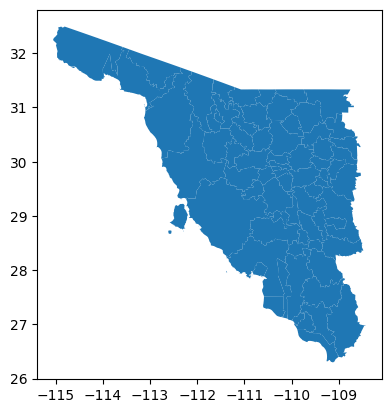

In [20]:
mun_sonora.plot()

In [21]:
# Merge por nombre de municipio
pob_mun_mapa = mun_sonora.merge(poblacion_total_mun, left_on="nom_mun", right_on="NOM_MUN", how="left")

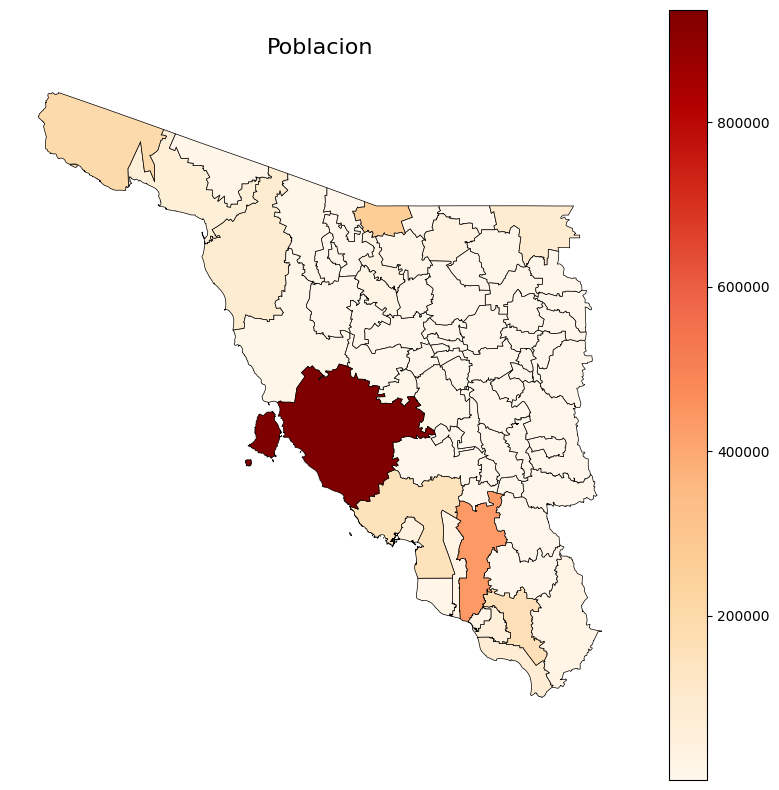

In [22]:
plot_sonora_map(poblacion_total_mun, "Poblacion")

In [23]:
poblacion_total_mun

,NOM_MUN,POBTOT
3351,Hermosillo,936263
1268,Cajeme,436484
5290,Nogales,264782
6104,San Luis Río Colorado,199021
4982,Navojoa,164387
...,...,...
566,Atil,626
6094,San Javier,537
5579,Oquitoa,496
6090,San Felipe de Jesús,369


In [24]:
pob_mun_mapa

,gid,cve_ent,nom_mun,cve_umun,no_locs,p_total,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,p_3ymas_f,p_5ymas,p_5ymas_m,p_5ymas_f,p_12ymas,p_12ymas_m,p_12ymas_f,p_15ymas,p_15ymas_m,p_15ymas_f,p_18ymas,p_18ymas_m,p_18ymas_f,p_3a5,p_3a5_m,p_3a5_f,p_6a11,p_6a11_m,p_6a11_f,p_8a14,p_8a14_m,p_8a14_f,p_12a14,p_12a14_m,p_12a14_f,p_15a17,p_15a17_m,p_15a17_f,p_18a24,p_18a24_m,p_18a24_f,p_15a49_f,p_60ymas,p_60ymas_m,p_60ymas_f,rel_h_m,prom_hnv,pnacent,pnacent_m,pnacent_f,pnacoe,pnacoe_m,pnacoe_f,pres2005,pres2005_m,pres2005_f,presoe05,presoe05_m,presoe05_f,p3ym_hli,p3ym_hli_m,p3ym_hli_f,p3hlinhe,p3hlinhe_m,p3hlinhe_f,p3hli_he,p3hli_he_m,p3hli_he_f,p5_hli,p5_hli_nhe,p5_hli_he,phog_ind,pcon_lim,pclim_mot,pclim_vis,pclim_leng,pclim_aud,pclim_mot2,pclim_men,pclim_men2,psin_lim,p3a5_noa,p3a5_noa_m,p3a5_noa_f,p6a11_noa,p6a11_noam,p6a11_noaf,p12a14noa,p12a14noam,p12a14noaf,p15a17a,p15a17a_m,p15a17a_f,p18a24a,p18a24a_m,p18a24a_f,p8a14an,p8a14an_m,p8a14an_f,p15ym_an,p15ym_an_m,p15ym_an_f,p15ym_se,p15ym_se_m,p15ym_se_f,p15pri_in,p15pri_inm,p15pri_inf,p15pri_co,p15pri_com,p15pri_cof,p15sec_in,p15sec_inm,p15sec_inf,p15sec_co,p15sec_com,p15sec_cof,p18ym_pb,p18ym_pb_m,p18ym_pb_f,graproes,graproes_m,graproes_f,pea,pea_m,pea_f,pe_inac,pe_inac_m,pe_inac_f,pocupada,pocupada_m,pocupada_f,pdesocup,pdesocup_m,pdesocup_f,psinder,pder_ss,pder_imss,pder_iste,pder_istee,pder_segp,p12ym_solt,p12ym_casa,p12ym_sepa,pcatolica,pncatolica,potras_rel,psin_relig,tothog,hogfem_m,hogfem_f,pobhog,phogjef_m,phogjef_f,t_vivhab,tvivpar,vivpar_hab,vivpar_des,vivpar_ut,ocupvivpar,prom_ocup,pro_ocup_c,vph_pisodt,vph_pisoti,vph_1dor,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aguafv,vph_excsa,vph_drenaj,vph_nodren,vph_c_serv,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,nom_ent,rep_pobtot,geometry,NOM_MUN,POBTOT
0,274,26,Etchojoa,26026,213.0,60717.0,30875.0,29373.0,3142.0,1640.0,1502.0,56932.0,29147.0,27785.0,54613.0,27944.0,26669.0,45811.0,23362.0,22449.0,42270.0,21597.0,20673.0,38579.0,19683.0,18896.0,3505.0,1842.0,1663.0,7616.0,3943.0,3673.0,8753.0,4494.0,4259.0,3541.0,1765.0,1776.0,3691.0,1914.0,1777.0,7535.0,3962.0,3573.0,14645.0,6871.0,3533.0,3338.0,11425.28,270.51,58399.0,29916.0,28483.0,1482.0,782.0,700.0,53843.0,27534.0,26309.0,309.0,158.0,151.0,9198.0,4933.0,4265.0,37.0,11.0,26.0,8860.0,4762.0,4098.0,9160.0,37.0,8827.0,21585.0,3062.0,1568.0,1049.0,231.0,328.0,146.0,131.0,303.0,56721.0,1522.0,800.0,722.0,156.0,80.0,76.0,165.0,96.0,69.0,2793.0,1418.0,1375.0,2379.0,1249.0,1130.0,320.0,212.0,108.0,2625.0,1304.0,1321.0,2303.0,1209.0,1094.0,6562.0,3673.0,2889.0,5378.0,2722.0,2656.0,2340.0,1338.0,1002.0,11655.0,5540.0,6115.0,12155.0,6210.0,5945.0,737.07,717.91,759.66,21610.0,16138.0,5472.0,23951.0,7054.0,16897.0,20540.0,15242.0,5298.0,1070.0,896.0,174.0,12951.0,46975.0,12932.0,4946.0,3054.0,26225.0,15798.0,25092.0,4829.0,47794.0,6286.0,1.0,5055.0,14070.0,10792.0,3278.0,60063.0,47421.0,12642.0,14249.0,15932.0,14070.0,1449.0,413.0,60063.0,420.88,169.71,11772.0,2240.0,6511.0,7492.0,2262.0,3698.0,8035.0,13309.0,700.0,13069.0,932.0,13398.0,6592.0,7349.0,6392.0,636.0,9807.0,12498.0,10349.0,5725.0,4704.0,2048.0,2172.0,8316.0,1177.0,Sonora,Población de 50 mil a 100 mil habitantes,"POLYGON ((-109.59743 27.16337, -109.5963 27.16...",Etchojoa,61309
1,275,26,Navojoa,26042,300.0,157729.0,77842.0,79173.0,8020.0,4065.0,3955.0,147759.0,73159.0,74600.0,141878.0,70166.0,71712.0,120189.0,59134.0,61055.0,111330.0,54710.0,56620.0,102518.0,50285.0,52233.0,8869.0,4540.0,4329.0,18701.0,9485.0,9216.0,21593.0,10868.0,10725.0,8859.0,4424.0,4435.0,8812.0,4425.0,4387.0,18905.0,9525.0,9380.0,40689.0,16487.0,7962.0,8525.0,16693.90,407.60,143028.0,70777.0,72251.0,12020.0,6052.0,5968.0,138153.0,68117.0,70036.0,2541.0,1359.0,1182.0,7220.0,3903.0,3317.0,27.0,11.0,16.0,6696.0,3616.0,3080.0,7199.0,27.0,6683.0,18418.0,7625.0,4111.0,2313.0,705.0,819.0,514.0,347.0,851.0,147527.0,4110.0,2114.0,1996.0,283.0,162.0,121.0,325.0,20

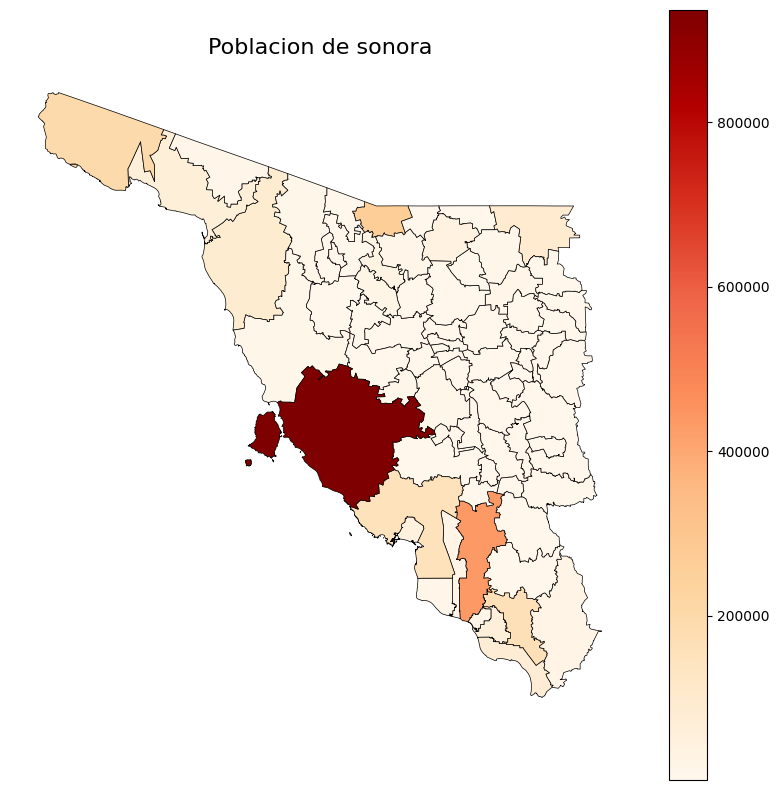

In [25]:
plot_sonora_map(poblacion_total_mun, "Poblacion de sonora")

In [26]:
import folium

# Convertir GeoDataFrame a GeoJSON
geojson_data = pob_mun_mapa.to_json()

# Crear mapa centrado en Sonora
m = folium.Map(location=[29.0, -110.0], zoom_start=6)

# Crear coroplético
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    data=pob_mun_mapa,
    columns=["nom_mun", "POBTOT"],
    key_on="feature.properties.nom_mun",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Población"
).add_to(m)

# Agregar tooltip con nombre y población
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': 'transparent', 'color': 'transparent'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["nom_mun", "POBTOT"],
        aliases=["Municipio:", "Población:"],
        localize=True
    )
).add_to(m)

# Guardar mapa
m.save("mapa_sonora_tooltip.html")

In [27]:
import folium

# Crear mapa centrado en Sonora con fondo blanco
m = folium.Map(location=[29.0, -110.0], zoom_start=6, tiles="CartoDB positron")  
# "CartoDB positron" es un fondo claro. Otra opción: "Stamen Toner Lite"

# Agregar coroplético solo con Sonora
folium.Choropleth(
    geo_data=pob_mun_mapa.to_json(),
    data=pob_mun_mapa,
    columns=["nom_mun", "POBTOT"],
    key_on="feature.properties.nom_mun",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Población"
).add_to(m)

m.save("mapa_sonora_blanco.html")

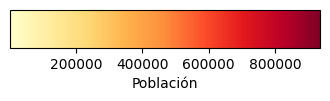

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Colormap
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=pob_mun_mapa["POBTOT"].min(), vmax=pob_mun_mapa["POBTOT"].max())

# Crear figura solo para la barra de color
fig, ax = plt.subplots(figsize=(4,1))
fig.subplots_adjust(bottom=0.5)

# Crear barra de color
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Población')

plt.savefig("leyenda.png", dpi=300, bbox_inches='tight')
plt.show()

### Piramide de población

In [29]:
cleaned_data

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,26,Sonora,0,Total de la entidad Sonora,0,Total de la Entidad,2944840,1472643,1472197,124294,61239,63055,2817821,1410043,1407778,2723770,1363541,1360229,2374818,1191883,1182935,2218268,1115432,1102836,2065941,1040798,1025143,143132,70693,72439,299871,147467,152404,358596,175659,182937,156550,76451,80099,152327,74634,77693,350392,171744,178648,769057,358404,188135,170269,723847,1981467,236801,218345,107741,110604,246711,121509,125202,258791,126600,132191,255716,124961,130755,247003,121417,125586,227896,113744,114152,215004,107549,107455,207000,103161,103839,203895,102318,101577,192181,95907,96274,170705,86583,84122,140464,71657,68807,121603,62762,58841,87708,45350,42358,61882,32496,29386,41519,21842,19677,26144,14305,11839,19548,11380,8168,2459398,1237307,1222091,425906,207534,218372,2629071,1322629,1306442,75302,33953,41349,62808,28170,34638,1104,605,499,61130,27307,33823,62070,1005,60499,126644,43510,21233,22277,145473,68891,64061,20976,26464,29021,26592,317996,92026,205671,18517,57018,14451,59609,40272,2458126,65700,32321,33379,11013,5155,5858,10145,4291,5854,117628,59793,57835,127769,65270,62499,8184,3312,4872,44134,21334,22800,55753,26531,29222,145810,69684,76126,214349,107284,107065,77822,33335,44487,581531,296908,284623,1051659,532419,519240,10.4,10.45,10.

In [30]:

lista_poblacion = []
counter = -1

while counter <= 80:
    counter += 1
    to = counter + 4
    lista_poblacion.append(f"P_{counter}A{to}_F")
    lista_poblacion.append(f"P_{counter}A{to}_M")

    counter += 4

lista_poblacion.append("P_85YMAS_F")
lista_poblacion.append("P_85YMAS_M")

print(lista_poblacion)
    

['P_0A4_F', 'P_0A4_M', 'P_5A9_F', 'P_5A9_M', 'P_10A14_F', 'P_10A14_M', 'P_15A19_F', 'P_15A19_M', 'P_20A24_F', 'P_20A24_M', 'P_25A29_F', 'P_25A29_M', 'P_30A34_F', 'P_30A34_M', 'P_35A39_F', 'P_35A39_M', 'P_40A44_F', 'P_40A44_M', 'P_45A49_F', 'P_45A49_M', 'P_50A54_F', 'P_50A54_M', 'P_55A59_F', 'P_55A59_M', 'P_60A64_F', 'P_60A64_M', 'P_65A69_F', 'P_65A69_M', 'P_70A74_F', 'P_70A74_M', 'P_75A79_F', 'P_75A79_M', 'P_80A84_F', 'P_80A84_M', 'P_85YMAS_F', 'P_85YMAS_M']


In [31]:
cleaned_data

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,26,Sonora,0,Total de la entidad Sonora,0,Total de la Entidad,2944840,1472643,1472197,124294,61239,63055,2817821,1410043,1407778,2723770,1363541,1360229,2374818,1191883,1182935,2218268,1115432,1102836,2065941,1040798,1025143,143132,70693,72439,299871,147467,152404,358596,175659,182937,156550,76451,80099,152327,74634,77693,350392,171744,178648,769057,358404,188135,170269,723847,1981467,236801,218345,107741,110604,246711,121509,125202,258791,126600,132191,255716,124961,130755,247003,121417,125586,227896,113744,114152,215004,107549,107455,207000,103161,103839,203895,102318,101577,192181,95907,96274,170705,86583,84122,140464,71657,68807,121603,62762,58841,87708,45350,42358,61882,32496,29386,41519,21842,19677,26144,14305,11839,19548,11380,8168,2459398,1237307,1222091,425906,207534,218372,2629071,1322629,1306442,75302,33953,41349,62808,28170,34638,1104,605,499,61130,27307,33823,62070,1005,60499,126644,43510,21233,22277,145473,68891,64061,20976,26464,29021,26592,317996,92026,205671,18517,57018,14451,59609,40272,2458126,65700,32321,33379,11013,5155,5858,10145,4291,5854,117628,59793,57835,127769,65270,62499,8184,3312,4872,44134,21334,22800,55753,26531,29222,145810,69684,76126,214349,107284,107065,77822,33335,44487,581531,296908,284623,1051659,532419,519240,10.4,10.45,10.

In [32]:
poblacion_por_edad = cleaned_data[["NOM_MUN", "NOM_LOC"] + lista_poblacion].copy()
poblacion_por_edad = poblacion_por_edad[(poblacion_por_edad['NOM_MUN'] == 'Total de la entidad Sonora') & (poblacion_por_edad["NOM_LOC"] == "Total de la Entidad")] 
poblacion_por_edad


,NOM_MUN,NOM_LOC,P_0A4_F,P_0A4_M,P_5A9_F,P_5A9_M,P_10A14_F,P_10A14_M,P_15A19_F,P_15A19_M,P_20A24_F,P_20A24_M,P_25A29_F,P_25A29_M,P_30A34_F,P_30A34_M,P_35A39_F,P_35A39_M,P_40A44_F,P_40A44_M,P_45A49_F,P_45A49_M,P_50A54_F,P_50A54_M,P_55A59_F,P_55A59_M,P_60A64_F,P_60A64_M,P_65A69_F,P_65A69_M,P_70A74_F,P_70A74_M,P_75A79_F,P_75A79_M,P_80A84_F,P_80A84_M,P_85YMAS_F,P_85YMAS_M
0,Total de la entidad Sonora,Total de la Entidad,107741,110604,121509,125202,126600,132191,124961,130755,121417,125586,113744,114152,107549,107455,103161,103839,102318,101577,95907,96274,86583,84122,71657,68807,62762,58841,45350,42358,32496,29386,21842,19677,14305,11839,11380,8168


In [33]:
# Transformar de formato ancho a largo
df_long = poblacion_por_edad.melt(
    id_vars=["NOM_MUN", "NOM_LOC"],
    var_name="GrupoSexo",
    value_name="Poblacion"
)

# Extraer grupo de edad (acepta 0A4, 5A9, ..., 85YMAS)
df_long["GrupoEdad"] = df_long["GrupoSexo"].str.extract(r"P_(\d+A\d+|85YMAS)_")[0]

# Extraer sexo
df_long["Sexo"] = df_long["GrupoSexo"].str.extract(r"_(F|M)$")[0]
df_long["Sexo"] = df_long["Sexo"].map({"F": "Mujeres", "M": "Hombres"})


In [34]:
df_long

,NOM_MUN,NOM_LOC,GrupoSexo,Poblacion,GrupoEdad,Sexo
0,Total de la entidad Sonora,Total de la Entidad,P_0A4_F,107741,0A4,Mujeres
1,Total de la entidad Sonora,Total de la Entidad,P_0A4_M,110604,0A4,Hombres
2,Total de la entidad Sonora,Total de la Entidad,P_5A9_F,121509,5A9,Mujeres
3,Total de la entidad Sonora,Total de la Entidad,P_5A9_M,125202,5A9,Hombres
4,Total de la entidad Sonora,Total de la Entidad,P_10A14_F,126600,10A14,Mujeres
5,Total de la entidad Sonora,Total de la Entidad,P_10A14_M,132191,10A14,Hombres
6,Total de la entidad Sonora,Total de la Entidad,P_15A19_F,124961,15A19,Mujeres
7,Total de la entidad Sonora,Total de la Entidad,P_15A19_M,130755,15A19,Hombres
8,Total de la entidad Sonora,Total de la Entidad,P_20A24_F,121417,20A24,Mujeres
9,Total de la entidad Sonora,Total de la Entidad,P_20A24_M,125586,20A24,Hombres


In [35]:
df_long["Poblacion"] = pd.to_numeric(df_long["Poblacion"], errors="coerce")

# Poner los hombres negativos para la pirámide
df_long["PoblacionPlot"] = df_long.apply(
    lambda x: -x["Poblacion"] if x["Sexo"] == "Hombres" else x["Poblacion"], axis=1
)

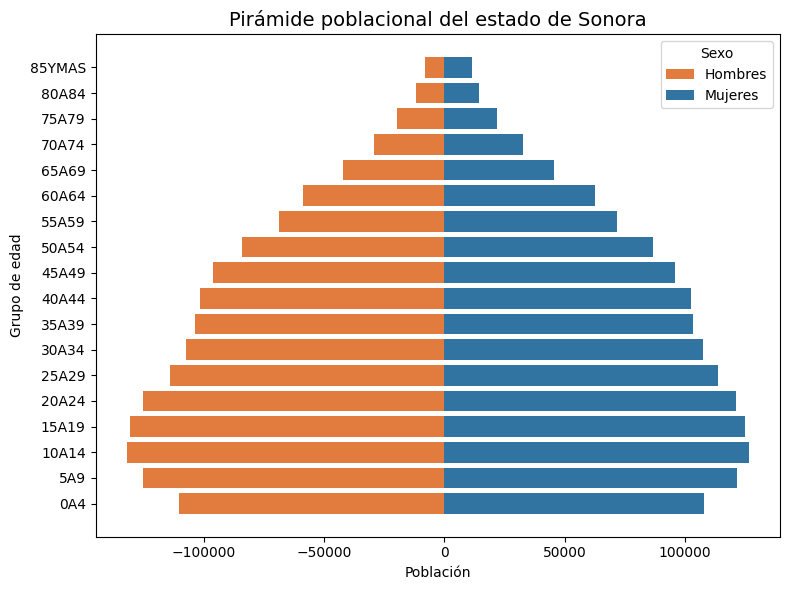

In [36]:
import matplotlib.pyplot as plt

orden_edad = [
    "0A4", "5A9", "10A14", "15A19", "20A24", "25A29", "30A34", "35A39",
    "40A44", "45A49", "50A54", "55A59", "60A64", "65A69", "70A74", "75A79",
    "80A84", "85YMAS"
]

# Filtrar por sexo
hombres = df_long[df_long["Sexo"] == "Hombres"]
mujeres = df_long[df_long["Sexo"] == "Mujeres"]

# Asegurar el mismo orden en los grupos
hombres = hombres.set_index("GrupoEdad").reindex(orden_edad).reset_index()
mujeres = mujeres.set_index("GrupoEdad").reindex(orden_edad).reset_index()

# Crear figura
plt.figure(figsize=(8, 6))

# Dibujar barras
plt.barh(hombres["GrupoEdad"], hombres["PoblacionPlot"], color="#E27C3E", label="Hombres")
plt.barh(mujeres["GrupoEdad"], mujeres["PoblacionPlot"], color="#3274A1", label="Mujeres")

# Etiquetas y formato
plt.title("Pirámide poblacional del estado de Sonora", fontsize=14)
plt.xlabel("Población")
plt.ylabel("Grupo de edad")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

In [37]:
df_long.to_csv("piramide_poblacional_sonora.csv", index=False)

### Comparacion de crecimiento de poblacion con respecto al resto de estados


In [38]:
poblacion_por_estado = pd.read_excel("/Users/luishernandez/Desktop/Stats_Sonora/Datos/INEGI/Mexico/Poblacion_01-2.xlsx")

In [39]:
poblacion_por_estado

,Instituto Nacional de Estadística y Geografía (INEGI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Población total por entidad federativa y grupo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fecha de consulta: 30/09/2025 13:41:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Entidad federativa,Grupo quinquenal de edad,1990,1990,1990,1995,1995,1995,2000,2000,2000,2005,2005,2005,2010,2010,2010,2020,2020,2020
5,Entidad federativa,Grupo quinquenal de edad,Total,Hombres,Mujeres,Total,Hombres,Mujeres,Total,Hombres,Mujeres,Total,Hombres,Mujeres,Total,Hombres,Mujeres,Total,Hombres,Mujeres
6,Estados Unidos Mexicanos,Total,81249645,39893969,41355676,91158290,44900499,46257791,97483412,47592253,49891159,103263388,50249955,53013433,112336538,54855231,57481307,126014024,61473390,64540634
7,Aguascalientes,Total,719659,350218,369441,862720,422324,440396,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924
8,Baja California,Total,1660855,832090,828765,2112140,1064591,1047549,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431
9,Baja California Sur,Total,317764,161833,155931,375494,191013,184481,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568


In [40]:
cleaned_poblacion_estado = poblacion_por_estado.drop([0,1,2,3,5, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]).copy()
cleaned_poblacion_estado

,Instituto Nacional de Estadística y Geografía (INEGI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
4,Entidad federativa,Grupo quinquenal de edad,1990,1990,1990,1995,1995,1995,2000,2000,2000,2005,2005,2005,2010,2010,2010,2020,2020,2020
6,Estados Unidos Mexicanos,Total,81249645,39893969,41355676,91158290,44900499,46257791,97483412,47592253,49891159,103263388,50249955,53013433,112336538,54855231,57481307,126014024,61473390,64540634
7,Aguascalientes,Total,719659,350218,369441,862720,422324,440396,944285,456533,487752,1065416,515364,550052,1184996,576638,608358,1425607,696683,728924
8,Baja California,Total,1660855,832090,828765,2112140,1064591,1047549,2487367,1252581,1234786,2844469,1431789,1412680,3155070,1591610,1563460,3769020,1900589,1868431
9,Baja California Sur,Total,317764,161833,155931,375494,191013,184481,424041,216250,207791,512170,261288,250882,637026,325433,311593,798447,405879,392568
10,Campeche,Total,535185,268772,266413,642516,322991,319525,690689,344334,346355,754730,373457,381273,822441,407721,414720,928363,456939,471424
11,Coahuila de Zaragoza,Total,1972340,979097,993243,2173775,1080594,1093181,2298070,1140195,1157875,2495200,1236880,1258320,2748391,1364197,1384194,3146771,1563669,1583102
12,Colima,Total,428510,212543,215967,488028,242787,245241,542627,268192,274435,567996,280005,287991,650555,322790,327765,731391,360622,370769
13,Chiapas,Total,3210496,1604773,1605723,3584786,1790580,1794206,3920892,1941880,1979012,4293459,2108830,2184629,4796580,2352807,2443773,5543828,2705947,2837881
14,Chihuahua,Total,2441873,1213302,1228571,2793537,1391914,1401623,3052907,1519972,1532935,3241444,1610275,1631169,3406465,1692545,1713920,3741869,1853822,1888047


In [41]:
cleaned_poblacion_estado = cleaned_poblacion_estado.drop(columns=['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 19'])

In [42]:
cleaned_poblacion_estado

,Instituto Nacional de Estadística y Geografía (INEGI),Unnamed: 2,Unnamed: 5,Unnamed: 8,Unnamed: 11,Unnamed: 14,Unnamed: 17
4,Entidad federativa,1990,1995,2000,2005,2010,2020
6,Estados Unidos Mexicanos,81249645,91158290,97483412,103263388,112336538,126014024
7,Aguascalientes,719659,862720,944285,1065416,1184996,1425607
8,Baja California,1660855,2112140,2487367,2844469,3155070,3769020
9,Baja California Sur,317764,375494,424041,512170,637026,798447
10,Campeche,535185,642516,690689,754730,822441,928363
11,Coahuila de Zaragoza,1972340,2173775,2298070,2495200,2748391,3146771
12,Colima,428510,488028,542627,567996,650555,731391
13,Chiapas,3210496,3584786,3920892,4293459,4796580,5543828
14,Chihuahua,2441873,2793537,3052907,3241444,3406465,3741869


In [43]:
cleaned_poblacion_estado.columns = cleaned_poblacion_estado.iloc[0]
cleaned_poblacion_estado = cleaned_poblacion_estado.drop(cleaned_poblacion_estado.index[0])
cleaned_poblacion_estado


4,Entidad federativa,1990,1995,2000,2005,2010,2020
6,Estados Unidos Mexicanos,81249645,91158290,97483412,103263388,112336538,126014024
7,Aguascalientes,719659,862720,944285,1065416,1184996,1425607
8,Baja California,1660855,2112140,2487367,2844469,3155070,3769020
9,Baja California Sur,317764,375494,424041,512170,637026,798447
10,Campeche,535185,642516,690689,754730,822441,928363
11,Coahuila de Zaragoza,1972340,2173775,2298070,2495200,2748391,3146771
12,Colima,428510,488028,542627,567996,650555,731391
13,Chiapas,3210496,3584786,3920892,4293459,4796580,5543828
14,Chihuahua,2441873,2793537,3052907,3241444,3406465,3741869
15,Ciudad de México,8235744,8489007,8605239,8720916,8851080,9209944


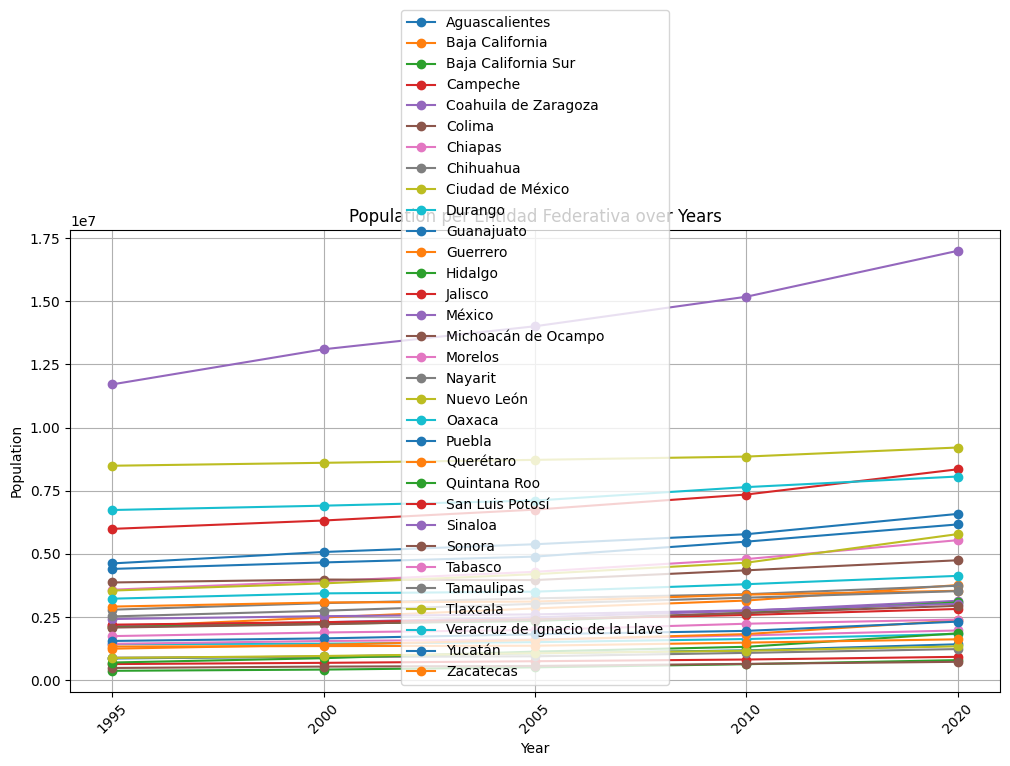

In [44]:
# Plot directly
plt.figure(figsize=(12, 6))
for i, row in cleaned_poblacion_estado[1:].iterrows():
    plt.plot(cleaned_poblacion_estado.columns[2:], row[2:], marker='o', label=row['Entidad federativa'])

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population per Entidad Federativa over Years")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [45]:
df_long = cleaned_poblacion_estado[1:].melt(
    id_vars="Entidad federativa", 
    var_name="Year", 
    value_name="Population"
)
print(df_long.head(10))


     Entidad federativa  Year Population
0        Aguascalientes  1990     719659
1       Baja California  1990    1660855
2   Baja California Sur  1990     317764
3              Campeche  1990     535185
4  Coahuila de Zaragoza  1990    1972340
5                Colima  1990     428510
6               Chiapas  1990    3210496
7             Chihuahua  1990    2441873
8      Ciudad de México  1990    8235744
9               Durango  1990    1349378


In [46]:
df_long

,Entidad federativa,Year,Population
0,Aguascalientes,1990,719659
1,Baja California,1990,1660855
2,Baja California Sur,1990,317764
3,Campeche,1990,535185
4,Coahuila de Zaragoza,1990,1972340
...,...,...,...
187,Tamaulipas,2020,3527735
188,Tlaxcala,2020,1342977
189,Veracruz de Ignacio de la Llave,2020,8062579
190,Yucatán,2020,2320898


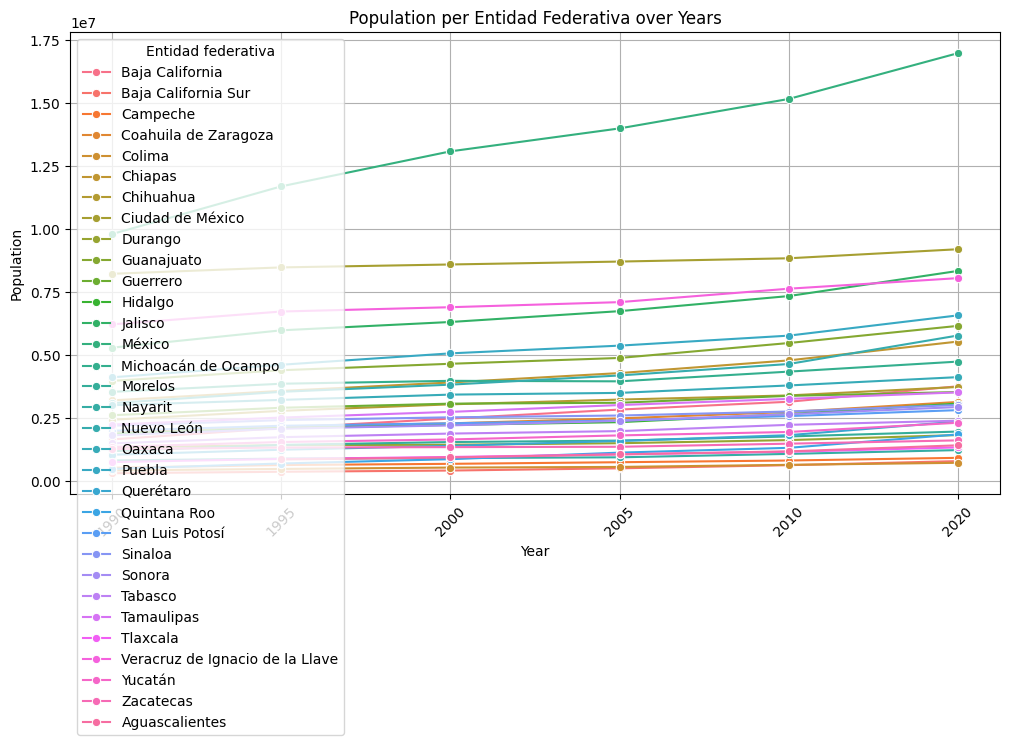

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_long[1:], 
    x="Year", 
    y="Population", 
    hue="Entidad federativa", 
    marker="o"
)

plt.title("Population per Entidad Federativa over Years")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/bt/nvzckywj42s3jj55fjzzjdm80000gn/T/ipykernel_81214/3849978737.py:6: UserWarning: The palette list has more values (32) than needed (31), which may not be intended.
  sns.lineplot(


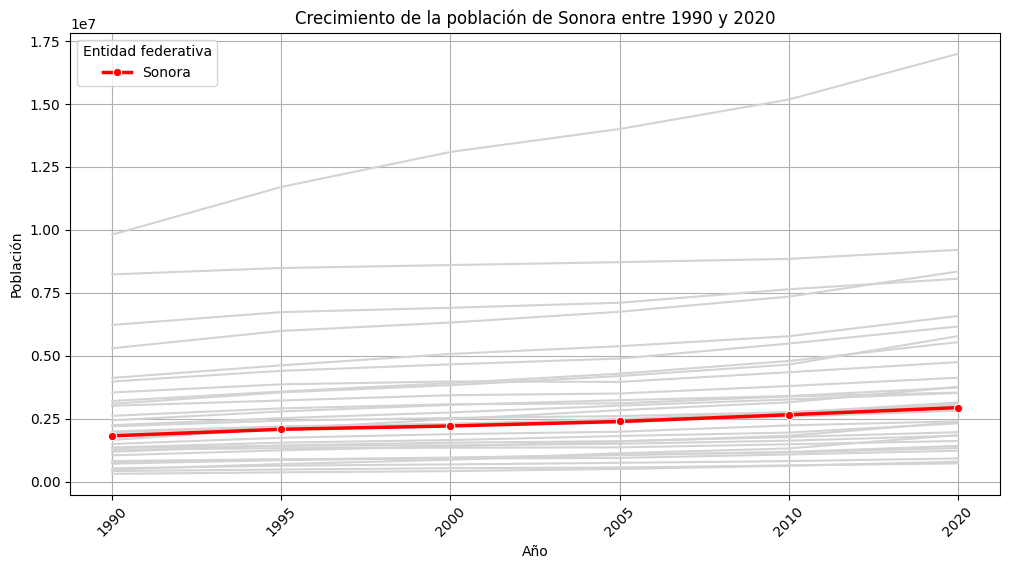

In [48]:
highlight = "Sonora"

plt.figure(figsize=(12,6))

# Plot all lines in light gray
sns.lineplot(
    data=df_long[df_long["Entidad federativa"] != highlight],
    x="Year",
    y="Population",
    hue="Entidad federativa",
    palette=["lightgray"]*df_long["Entidad federativa"].nunique(),
    legend=False
)

# Plot the highlighted line in a strong color
sns.lineplot(
    data=df_long[df_long["Entidad federativa"] == highlight],
    x="Year",
    y="Population",
    hue="Entidad federativa",
    palette=["red"],  # choose your highlight color
    marker="o",
    linewidth=2.5
)

plt.title(f"Crecimiento de la población de {highlight} entre 1990 y 2020")
plt.xticks(rotation=45)
plt.ylabel("Población")
plt.xlabel("Año")
plt.grid(True)
plt.show()


In [49]:
cleaned_poblacion_estado['porc_aumento_90_20'] = ((cleaned_poblacion_estado['2020'] - cleaned_poblacion_estado['1990']) / cleaned_poblacion_estado['1990']) * 100
cleaned_poblacion_estado

4,Entidad federativa,1990,1995,2000,2005,2010,2020,porc_aumento_90_20
6,Estados Unidos Mexicanos,81249645,91158290,97483412,103263388,112336538,126014024,55.094861
7,Aguascalientes,719659,862720,944285,1065416,1184996,1425607,98.094792
8,Baja California,1660855,2112140,2487367,2844469,3155070,3769020,126.932514
9,Baja California Sur,317764,375494,424041,512170,637026,798447,151.27044
10,Campeche,535185,642516,690689,754730,822441,928363,73.465811
11,Coahuila de Zaragoza,1972340,2173775,2298070,2495200,2748391,3146771,59.545058
12,Colima,428510,488028,542627,567996,650555,731391,70.682364
13,Chiapas,3210496,3584786,3920892,4293459,4796580,5543828,72.67824
14,Chihuahua,2441873,2793537,3052907,3241444,3406465,3741869,53.237658
15,Ciudad de México,8235744,8489007,8605239,8720916,8851080,9209944,11.828925


In [50]:
porc_crecimiento = cleaned_poblacion_estado[['Entidad federativa', 'porc_aumento_90_20']].copy().sort_values(by='porc_aumento_90_20', ascending=False).reset_index(drop=True)   
porc_crecimiento

4,Entidad federativa,porc_aumento_90_20
0,Quintana Roo,276.661592
1,Baja California Sur,151.27044
2,Baja California,126.932514
3,Querétaro,125.303286
4,Aguascalientes,98.094792
5,Nuevo León,86.671017
6,Tlaxcala,76.411083
7,Campeche,73.465811
8,México,73.113008
9,Chiapas,72.67824


/var/folders/bt/nvzckywj42s3jj55fjzzjdm80000gn/T/ipykernel_81214/191567727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


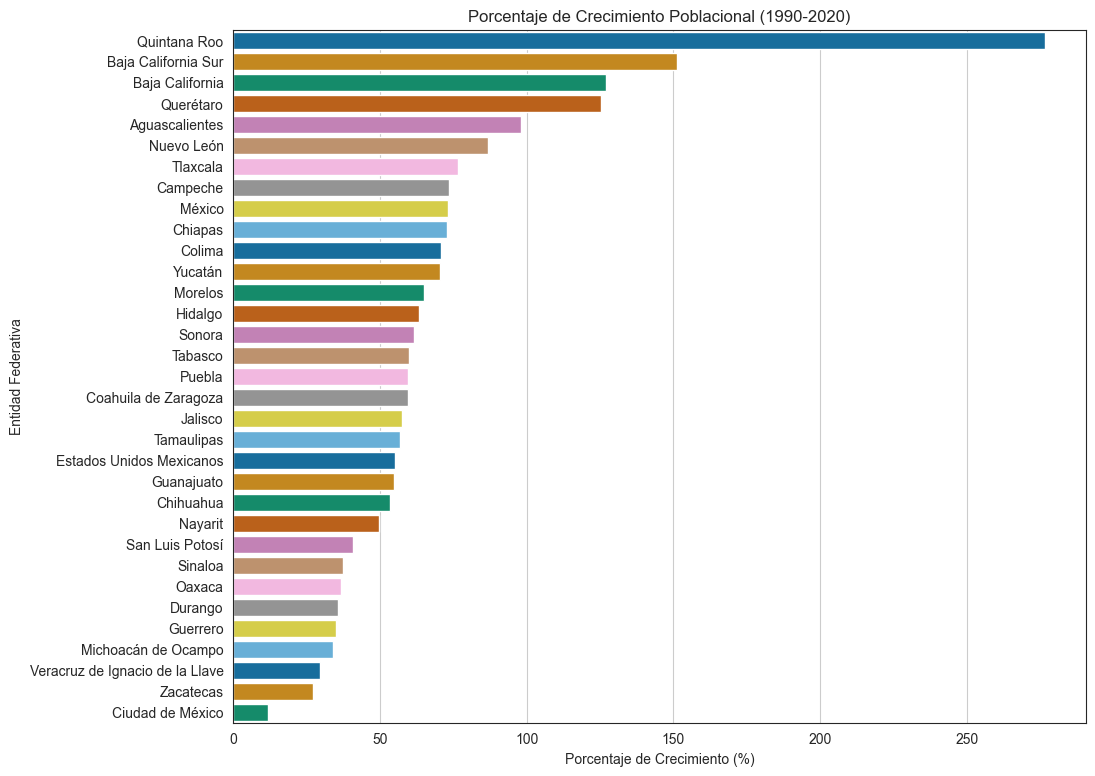

In [51]:
sns.set_style("white")
plt.figure(figsize=(11, 9))
sns.barplot(
    data=porc_crecimiento,
    x='porc_aumento_90_20',
    y='Entidad federativa',
    palette='colorblind'
)
plt.title('Porcentaje de Crecimiento Poblacional (1990-2020)')
plt.xlabel('Porcentaje de Crecimiento (%)')
plt.ylabel('Entidad Federativa')
plt.grid(axis='x')

### Poblacion afiliada al seguro social

In [8]:
# Datos de poblacion afilida y no afiliada al seguro social por estado
datos_afiliacion_seguro = cleaned_data[cleaned_data["NOM_LOC"] == 'Total del Municipio'][["NOM_MUN","NOM_LOC","POBTOT","PDER_SS","PSINDER"]]
datos_afiliacion_seguro

,NOM_MUN,NOM_LOC,POBTOT,PDER_SS,PSINDER
3,Aconchi,Total del Municipio,2563,2026,532
13,Agua Prieta,Total del Municipio,91929,65050,26718
114,Alamos,Total del Municipio,24976,20992,3949
392,Altar,Total del Municipio,9492,6409,3075
493,Arivechi,Total del Municipio,1177,934,242
...,...,...,...,...,...
7105,Villa Pesqueira,Total del Municipio,1043,655,385
7143,Yécora,Total del Municipio,4793,3316,1450
7216,General Plutarco Elías Calles,Total del Municipio,13627,10157,3445
7291,Benito Juárez,Total del Municipio,21692,17561,4113


In [9]:
datos_afiliacion_seguro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 3 to 7360
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOM_MUN  72 non-null     object
 1   NOM_LOC  72 non-null     object
 2   POBTOT   72 non-null     int64 
 3   PDER_SS  72 non-null     object
 4   PSINDER  72 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [10]:
# Porcentaje de población afiliada al seguro social
datos_afiliacion_seguro['PORC_AFI_SS'] = ((datos_afiliacion_seguro['PDER_SS'].astype(float) / datos_afiliacion_seguro['POBTOT'].astype(float)) * 100)
# Redondeamos a 2 decimales
datos_afiliacion_seguro['PORC_AFI_SS'] = round(datos_afiliacion_seguro['PORC_AFI_SS'], 2)

In [11]:
datos_afiliacion_seguro.reset_index(drop=True, inplace=True)
datos_afiliacion_seguro

,NOM_MUN,NOM_LOC,POBTOT,PDER_SS,PSINDER,PORC_AFI_SS
0,Aconchi,Total del Municipio,2563,2026,532,79.05
1,Agua Prieta,Total del Municipio,91929,65050,26718,70.76
2,Alamos,Total del Municipio,24976,20992,3949,84.05
3,Altar,Total del Municipio,9492,6409,3075,67.52
4,Arivechi,Total del Municipio,1177,934,242,79.35
...,...,...,...,...,...,...
67,Villa Pesqueira,Total del Municipio,1043,655,385,62.80
68,Yécora,Total del Municipio,4793,3316,1450,69.18
69,General Plutarco Elías Calles,Total del Municipio,13627,10157,3445,74.54
70,Benito Juárez,Total del Municipio,21692,17561,4113,80.96


In [12]:
datos_afiliacion_mapa = datos_afiliacion_seguro[['NOM_MUN', 'PORC_AFI_SS']]
datos_afiliacion_mapa

,NOM_MUN,PORC_AFI_SS
0,Aconchi,79.05
1,Agua Prieta,70.76
2,Alamos,84.05
3,Altar,67.52
4,Arivechi,79.35
...,...,...
67,Villa Pesqueira,62.80
68,Yécora,69.18
69,General Plutarco Elías Calles,74.54
70,Benito Juárez,80.96


/Users/luishernandez/Desktop/Stats_Sonora/Libretas/helpFunctions.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pob_mun_mapa["centroid"] = pob_mun_mapa.geometry.centroid


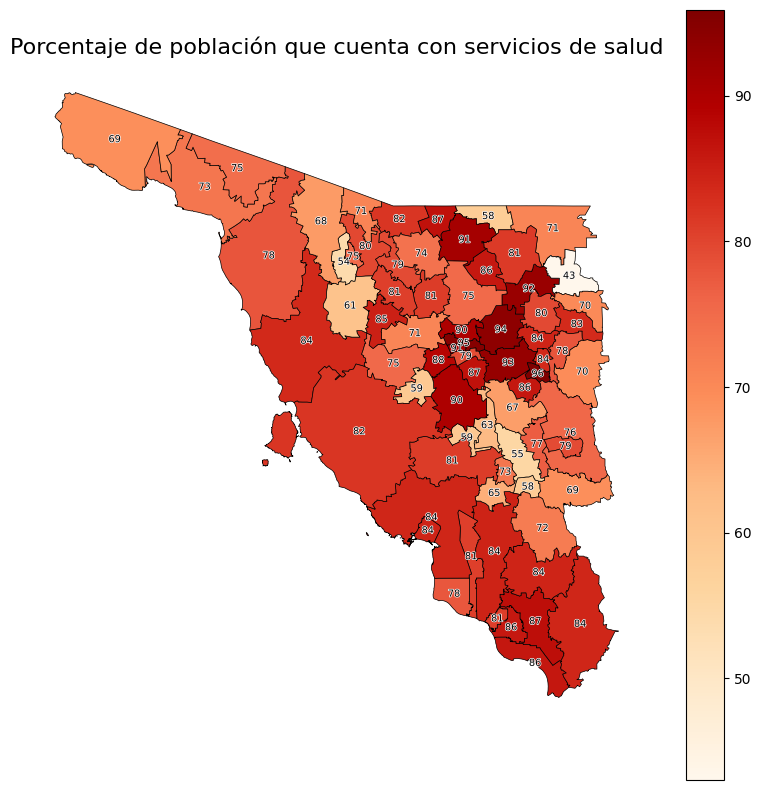

In [21]:
plot_sonora_map(datos_afiliacion_mapa, 'Porcentaje de población que cuenta con servicios de salud', graph_value=True, height=10, weight=10)

#### Cual es el porcentaje a nivel estatal?

In [14]:
datos_afiliacion_sonora = cleaned_data[cleaned_data["NOM_LOC"] == 'Total de la Entidad'][["NOM_MUN","NOM_LOC","POBTOT","PDER_SS","PSINDER"]]

In [15]:
datos_afiliacion_sonora['PORC_AFI_SS'] = ((datos_afiliacion_sonora['PDER_SS'].astype(float) / datos_afiliacion_sonora['POBTOT'].astype(float)) * 100)
datos_afiliacion_sonora['PORC_AFI_SS'] = round(datos_afiliacion_sonora['PORC_AFI_SS'], 2)
datos_afiliacion_sonora

,NOM_MUN,NOM_LOC,POBTOT,PDER_SS,PSINDER,PORC_AFI_SS
0,Total de la entidad Sonora,Total de la Entidad,2944840,2391479,547727,81.21


In [16]:
datos_afiliacion_sonora

,NOM_MUN,NOM_LOC,POBTOT,PDER_SS,PSINDER,PORC_AFI_SS
0,Total de la entidad Sonora,Total de la Entidad,2944840,2391479,547727,81.21
